# Vectorization: Pandas and GeoPandas

Pandas is based on numpy, therefore it provides vectorized computation as well. 

&rarr; [Pandas User Guide: Accelerated Operations](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#accelerated-operations)

## 1. Vectorization in Pandas

In [ ]:
import pandas as pd

In [ ]:
file_path = "./data/new_york_hotels.csv"

In [ ]:
data = pd.read_csv(file_path, encoding='cp1252')

In [ ]:
data.head()

**Exercise:** Create a `geometry` column which contains Point geometries based on the latitude and longitude columns. 

**E1.1:** Write a function which takes a longitude and a latitude value and returns a shapely Point object.

In [ ]:
from shapely.geometry import Point

def make_geom(lon, lat):
    point_geom = Point(lon, lat)
    return point_geom

**E1.2:** Apply the function above to each row in the dataframe. Search online for different ways to do this in pandas. 

In [ ]:
# import pandas as pd
# from shapely.geometry import Point

# geometry_list = Point(xy) for xy in zip(df['longitude'], df['latitude'])])
# for index, row in data.iterrows():
#     new_geom = make_geom(row["longitude"], row["latitude"])
#     geometry_list.append(geometry)

# data["new_geom"] = geometry_list

In [ ]:
# data.apply(lambda r: make_geom(r["longitude"], r["latitude"], axis=1))

**E1.3:** Plot the points. 

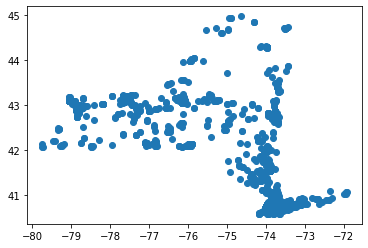

In [44]:
# Matplotlib

import matplotlib.pyplot as plt

plt.scatter(x=data['longitude'], y=data['latitude'])
plt.show()

### GeoPandas

In [ ]:
import geopandas as gpd

data["geometry"] = gpd.points_from_xy(data.longitude, data.latitude)
data.head()

<AxesSubplot:>

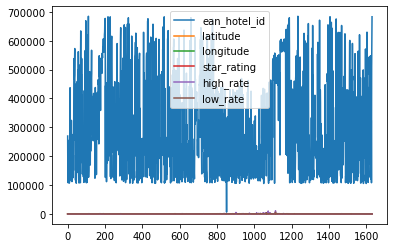

In [45]:
data.plot()

### More on pandas and vectorization

To take a closer look at vectorized computation using Pandas, we will take a look at __Sofia Heisler's repository [PyCon 2017: Optimizing Pandas Code for Performance](https://github.com/s-heisler/pycon2017-optimizing-pandas)__. This repo contains the material of her talk which she gave at the PyCon Conference 2017.

&rarr; Watch her talk on [YouTube](https://www.youtube.com/watch?v=HN5d490_KKk) I really recommend it (especially if you like panda GIFs)

&rarr; Read her [blog post](https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6)


Conference talks and tutorials on GitHub are a great way to stay up-to-date with current developments in the scientific Python world and great resource to learn. Therefore, we will:

1. Clone Sofia's GitHub Repository to our computer. 
2. Work through the notebook to learn about Pandas. 

## 2. Vectorization in GeoPandas

### GeoPandas is great ... but [was] still a bit slow

Geopandas make spatial analysis in Python a lot easier, but it has got a bottleneck: geometric opertions are performed using shapely, which - as we have seen - is not the fastest, since it is performed in Python. In addition, operations along a series of shapely objects cannot be vectorized in Python. 

But the GeoPandas developers also found a solution for this problem: Yet another package - PyGEOS

The PyGEOS packages allows vectorized geometric calculations based on the C library GEOS. It is pretty new and still under development.

&rarr; Take a look at the [PyGEOS User Guide](https://pygeos.readthedocs.io/en/latest/#)

### Compare the shapely vs. pygeos GeoPandas

In order to use pygeos support in GeoPandas, you need to install pygeos. Unfortunately, there some conflicts with packages in our _advgeo_ environment. So in order to execute the following code you need to set up a new conda environment which has pygeos and geopandas installed. 

### Install the `pygeos` package in your anaconda environment

```
$ conda install pygeos
```

### Bounding box computation pygeos vs. shapely  

In [ ]:
test_coordinates = [(1,1),(1,2),(2,2),(2,1),(1,1)]

#### Shapely

In [ ]:
from shapely.geometry import Polygon

In [ ]:
%%timeit
poly_shapely = Polygon(test_coordinates)
poly_shapely.bounds

#### PyGeos

In [ ]:
from pygeos import polygons, bounds

In [ ]:
%%timeit
poly_geos = polygons(test_coordinates)
bounds(poly_geos)

### PyGEOS integration in GeoPandas
The support of PyGEOS in GeoPandas is already partly implemented. So if pygeos is installed in your python environment you can enable the pygeos support.

&rarr; Take a loot at the [changes in the geopandas code](https://github.com/geopandas/geopandas/pull/1154/commits/e0658280a54e8f8ad1e9023952671553c756230a)

&rarr; Follow the development on GitHub: 
* [GeoPandas performance: optimizing vectorized operations](https://github.com/geopandas/geopandas/issues/430) 
* [Integrating pygeos in GeoPandas for vectorized array operations](https://github.com/geopandas/geopandas/issues/1155)

In [ ]:
import geopandas as gpd

### Example: Buffering locations of the DWD temperature stations

As a case study we will perform a simple geometric operation: buffering the points of the DWD temperature measurement stations. 

In [ ]:
file_path = "./data/DWD_temperature_shp/DWD_temperature.shp"

#### Buffering using shapely
In order to use shapely to perform the geometric operations, we need to disable the pygeos support of GeoPandas. 

In [ ]:
gpd.options.use_pygeos = False

In [ ]:
data_shapely = gpd.read_file(file_path)
data_shapely.to_crs(epsg="32632", inplace=True)

In [ ]:
data_shapely.head(10)

In [ ]:
type(data_shapely["geometry"][0])

In [ ]:
%%timeit
data_shapely.buffer(100)

#### Buffering using PyGEOS

In [ ]:
gpd.options.use_pygeos = True

In [ ]:
data_pygeos = gpd.read_file(file_path)
data_pygeos.to_crs(epsg="32632", inplace=True)

In [ ]:
data_pygeos["geometry"]

In [ ]:
%%timeit
data_pygeos.buffer(100)

### Resources

[Introducing pygeos](https://caspervdw.github.io/Introducing-Pygeos/)

[PyGEOS Documentation](https://pygeos.readthedocs.io/en/latest/)
   

[Cythonize Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/enhancingperf.html)

https://stackoverflow.com/questions/52673285/performance-of-pandas-apply-vs-np-vectorize-to-create-new-column-from-existing-c

https://www.google.com/url?q=http://homepages.math.uic.edu/~jan/mcs275/running_cython.pdf&sa=U&ved=2ahUKEwiq_M3-vfrqAhWF-KQKHXBXCfwQFjAAegQICRAB&usg=AOvVaw0jX9BZrTt2aPsxKo30zmDb
